## MICCAI Viz Spatial

### Imports

In [47]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [118]:
from imports import *

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [119]:
# overall imports
import importlib
import data

# importlib.reload(data.data_utils)
# importlib.reload(data.data_load)
#importlib.reload(sim.sim_utils)
# importlib.reload(models)

import models
import sim.sim 
import sim.sim_utils
from sim.sim_utils import bytes2human, print_system_usage
from sim.sim import Simulation
from sim.sim_run import single_sim_run, open_pickled_results, run_simulation_set


## Results visualization

In [120]:
results_df = pd.read_csv('LM_Feb5_spatial.csv')
print(results_df.shape)

print(results_df['Tags'].iloc[0])

(351, 25)
cv_type_spatial, feature_type_transcriptome, final_eval, gene_list_0.2, hemisphere_both, model_shared_transformer, omit_subcortical_False, outerfold_0, parcellation_S100, split_spatial1, target_FC


In [121]:
print('original shape: ', results_df.shape)

# Get column names that we want to keep
cols_to_keep = [col for col in results_df.columns if 
                col in ['Name', 'Tags'] or 
                'final_train_metrics' in col or 
                'final_test_metrics' in col]

# Drop all other columns
results_df = results_df[cols_to_keep]
results_df.head(20)

# Extract tags into separate columns
def extract_tag_value(tag_str, prefix):
    # Find tag that starts with prefix
    for tag in tag_str.split(', '):
        if tag.startswith(prefix):
            # Return everything after the prefix
            return tag[len(prefix):]
    return None

# Define the tag prefixes we want to extract
tag_prefixes = [
    'cv_type_',
    'feature_type_', 
    'gene_list_',
    'hemisphere_',
    'model_',
    'omit_subcortical_',
    'outerfold_',
    'parcellation_',
    'split_',
    'target_'
]

# Create new columns for each tag type
for prefix in tag_prefixes:
    col_name = prefix.rstrip('_')  # Remove trailing underscore for column name
    results_df[col_name] = results_df['Tags'].apply(lambda x: extract_tag_value(x, prefix))

# Drop original Tags column if desired
results_df = results_df.drop('Tags', axis=1)

# Display first few rows to verify
results_df.head()

original shape:  (351, 25)


,Name,final_test_metrics.geodesic_distance,final_test_metrics.mae,final_test_metrics.mse,final_test_metrics.pearson_corr,final_test_metrics.r2,final_train_metrics.geodesic_distance,final_train_metrics.mae,final_train_metrics.mse,final_train_metrics.pearson_corr,...,cv_type,feature_type,gene_list,hemisphere,model,omit_subcortical,outerfold,parcellation,split,target
0,shared_transformer_transcriptome_FC_spatial_fo...,3.744028,0.049176,0.004577,0.786086,0.615686,6.132417,0.031118,0.001902,0.945364,...,spatial,transcriptome,0.2,both,shared_transformer,False,0,S100,spatial1,FC
1,xgboost_transcriptome_FC_spatial_fold0_final_eval,4.516911,0.051846,0.005282,0.785848,0.556470,8.668797,0.041325,0.003651,0.901547,...,spatial,transcriptome,0.2,both,xgboost,False,0,S100,spatial1,FC
2,xgboost_transcriptome_FC_spatial_fold0_final_eval,4.106080,0.053818,0.005756,0.778610,0.516646,8.928918,0.066992,0.008701,0.715719,...,spatial,transcriptome,0.2,both,xgboost,False,0,S100,spatial1,FC
3,dynamic_mlp_transcriptome_FC_spatial_fold0_fin...,6.517635,0.053938,0.005380,0.744765,0.548217,6.905324,0.022318,0.001174,0.964194,...,spatial,transcriptome,0.2,both,dynamic_mlp,False,0,S100,spatial1,FC
4,dynamic_mlp_transcriptome_FC_spatial_fold2_fin...,8.207836,0.130668,0.034205,0.740519,0.508749,7.978428,0.015075,0.000483,0.992850,...,spatial,transcriptome,0.2,left,dynamic_mlp,False,2,S400,spatial1,FC


In [122]:
# Sort dataframe by final_test_metrics.pearson_corr in descending order
results_df = results_df.sort_values(by='final_test_metrics.pearson_corr', ascending=False)

# Display first few rows to verify sorting
results_df.head()
print(f"Shape before removing duplicates: {results_df.shape}")

# Keep only the row with highest pearson correlation for each unique name
results_df = results_df.sort_values('final_test_metrics.pearson_corr', ascending=False)
results_df = results_df.drop_duplicates(subset='Name', keep='first')
print(f"Shape after removing duplicates: {results_df.shape}")

Shape before removing duplicates: (351, 21)
Shape after removing duplicates: (71, 21)


In [123]:
results_df.head(20)

,Name,final_test_metrics.geodesic_distance,final_test_metrics.mae,final_test_metrics.mse,final_test_metrics.pearson_corr,final_test_metrics.r2,final_train_metrics.geodesic_distance,final_train_metrics.mae,final_train_metrics.mse,final_train_metrics.pearson_corr,...,cv_type,feature_type,gene_list,hemisphere,model,omit_subcortical,outerfold,parcellation,split,target
0,shared_transformer_transcriptome_FC_spatial_fo...,3.744028,0.049176,0.004577,0.786086,0.615686,6.132417,0.031118,0.001902,0.945364,...,spatial,transcriptome,0.2,both,shared_transformer,False,0,S100,spatial1,FC
1,xgboost_transcriptome_FC_spatial_fold0_final_eval,4.516911,0.051846,0.005282,0.785848,0.556470,8.668797,0.041325,0.003651,0.901547,...,spatial,transcriptome,0.2,both,xgboost,False,0,S100,spatial1,FC
3,dynamic_mlp_transcriptome_FC_spatial_fold0_fin...,6.517635,0.053938,0.005380,0.744765,0.548217,6.905324,0.022318,0.001174,0.964194,...,spatial,transcriptome,0.2,both,dynamic_mlp,False,0,S100,spatial1,FC
4,dynamic_mlp_transcriptome_FC_spatial_fold2_fin...,8.207836,0.130668,0.034205,0.740519,0.508749,7.978428,0.015075,0.000483,0.992850,...,spatial,transcriptome,0.2,left,dynamic_mlp,False,2,S400,spatial1,FC
5,shared_linear_encoder_transcriptome_FC_spatial...,3.629749,0.074714,0.009781,0.734037,0.178682,8.123366,0.088924,0.011048,0.852404,...,spatial,transcriptome,0.2,both,shared_linear_encoder,False,0,S100,spatial1,FC
6,dynamic_mlp_euclidean_SC_spatial_fold1_final_eval,6.982430,1.994017,7.742135,0.725956,0.471389,9.962464,1.027002,4.319449,0.794012,...,spatial,euclidean,0.2,both,dynamic_mlp,False,1,S100,spatial1,SC
7,bilinear_lowrank_transcriptome_FC_spatial_fold...,3.961641,0.054285,0.005820,0.723563,0.511318,8.719089,0.082705,0.011804,0.528690,...,spatial,transcriptome,0.2,both,bilinear_lowrank,False,0,S100,spatial1,FC
10,dynamic_mlp_euclidean_SC_spatial_fold3_final_eval,6.832826,1.645938,8.118004,0.686547,0.429222,11.145057,1.051587,4.389458,0.787977,...,spatial,euclidean,0.2,both,dynamic_mlp,False,3,S100,spatial42,SC
11,pls_transcriptome_FC_spatial_fold0_final_eval,7.343965,0.064039,0.007996,0.668479,0.328582,10.489756,0.088573,0.013190,0.441213,...,spatial,transcriptome,0.2,both,pls,False,0,S100,spatial1,FC
12,shared_transformer_transcriptome_FC_spatial_fo...,8.962243,0.144614,0.042044,0.667600,0.396178,7.374669,0.023899,0.001017,0.984917,...,spatial,transcriptome,0.2,left,shared_transformer,False,2,S400,spatial1,FC


In [124]:
# Create separate dataframes based on feature types
transcriptome_df = results_df[results_df['feature_type'].isin(['transcriptome'])]
euclidean_df = results_df[results_df['feature_type'] == 'euclidean']

print(f"Shape of transcriptome models: {transcriptome_df.shape}")
print(f"Shape of euclidean-only models: {euclidean_df.shape}")

# Create separate dataframes for SC and FC targets from transcriptome models
transcriptome_sc_df = transcriptome_df[transcriptome_df['target'] == 'SC']
transcriptome_fc_df = transcriptome_df[transcriptome_df['target'] == 'FC']

# Split transcriptome SC/FC by parcellation
transcriptome_sc_s100_df = transcriptome_sc_df[transcriptome_sc_df['parcellation'] == 'S100']
transcriptome_sc_s400_df = transcriptome_sc_df[transcriptome_sc_df['parcellation'] == 'S400']
transcriptome_fc_s100_df = transcriptome_fc_df[transcriptome_fc_df['parcellation'] == 'S100']
transcriptome_fc_s400_df = transcriptome_fc_df[transcriptome_fc_df['parcellation'] == 'S400']

# Create separate dataframes for SC and FC targets from euclidean models
euclidean_sc_df = euclidean_df[euclidean_df['target'] == 'SC']
euclidean_fc_df = euclidean_df[euclidean_df['target'] == 'FC']

# Split euclidean SC/FC by parcellation 
euclidean_sc_s100_df = euclidean_sc_df[euclidean_sc_df['parcellation'] == 'S100']
euclidean_sc_s400_df = euclidean_sc_df[euclidean_sc_df['parcellation'] == 'S400']
euclidean_fc_s100_df = euclidean_fc_df[euclidean_fc_df['parcellation'] == 'S100']
euclidean_fc_s400_df = euclidean_fc_df[euclidean_fc_df['parcellation'] == 'S400']

# Sort each dataframe by model and outerfold
transcriptome_sc_s100_df = transcriptome_sc_s100_df.sort_values(['model', 'outerfold'])
transcriptome_sc_s400_df = transcriptome_sc_s400_df.sort_values(['model', 'outerfold']) 
transcriptome_fc_s100_df = transcriptome_fc_s100_df.sort_values(['model', 'outerfold'])
transcriptome_fc_s400_df = transcriptome_fc_s400_df.sort_values(['model', 'outerfold'])

euclidean_sc_s100_df = euclidean_sc_s100_df.sort_values(['model', 'outerfold'])
euclidean_sc_s400_df = euclidean_sc_s400_df.sort_values(['model', 'outerfold'])
euclidean_fc_s100_df = euclidean_fc_s100_df.sort_values(['model', 'outerfold']) 
euclidean_fc_s400_df = euclidean_fc_s400_df.sort_values(['model', 'outerfold'])


print(f"Shape of transcriptome SC models: {transcriptome_sc_df.shape}")
print(f"  S100: {transcriptome_sc_s100_df.shape}")
print(f"  S400: {transcriptome_sc_s400_df.shape}")
print(f"Shape of transcriptome FC models: {transcriptome_fc_df.shape}")
print(f"  S100: {transcriptome_fc_s100_df.shape}")
print(f"  S400: {transcriptome_fc_s400_df.shape}")
print(f"Shape of euclidean SC models: {euclidean_sc_df.shape}")
print(f"  S100: {euclidean_sc_s100_df.shape}")
print(f"  S400: {euclidean_sc_s400_df.shape}")
print(f"Shape of euclidean FC models: {euclidean_fc_df.shape}")
print(f"  S100: {euclidean_fc_s100_df.shape}")
print(f"  S400: {euclidean_fc_s400_df.shape}")



Shape of transcriptome models: (55, 21)
Shape of euclidean-only models: (16, 21)
Shape of transcriptome SC models: (28, 21)
  S100: (19, 21)
  S400: (9, 21)
Shape of transcriptome FC models: (27, 21)
  S100: (17, 21)
  S400: (10, 21)
Shape of euclidean SC models: (8, 21)
  S100: (7, 21)
  S400: (1, 21)
Shape of euclidean FC models: (8, 21)
  S100: (5, 21)
  S400: (3, 21)


In [125]:
transcriptome_sc_s100_df

,Name,final_test_metrics.geodesic_distance,final_test_metrics.mae,final_test_metrics.mse,final_test_metrics.pearson_corr,final_test_metrics.r2,final_train_metrics.geodesic_distance,final_train_metrics.mae,final_train_metrics.mse,final_train_metrics.pearson_corr,...,cv_type,feature_type,gene_list,hemisphere,model,omit_subcortical,outerfold,parcellation,split,target
147,bilinear_lowrank_transcriptome_SC_spatial_fold...,7.966600,3.365208,16.038178,0.327102,-0.017926,16.069761,2.456845,8.457727,0.497684,...,spatial,transcriptome,0.2,both,bilinear_lowrank,False,0,S100,spatial1,SC
84,dynamic_mlp_transcriptome_SC_spatial_fold0_fin...,7.456312,3.001415,17.829136,0.476851,-0.131596,9.970107,0.875688,3.191936,0.847780,...,spatial,transcriptome,0.2,both,dynamic_mlp,False,0,S100,spatial1,SC
95,dynamic_mlp_transcriptome_SC_spatial_fold2_fin...,6.197509,2.906692,15.169186,0.459383,0.049960,11.778713,1.083540,4.619968,0.775549,...,spatial,transcriptome,0.2,both,dynamic_mlp,False,2,S100,spatial1,SC
133,dynamic_mlp_transcriptome_SC_spatial_fold3_fin...,5.925150,2.547641,14.421428,0.370981,-0.012707,9.412315,1.012279,3.640925,0.836094,...,spatial,transcriptome,0.2,both,dynamic_mlp,False,3,S100,spatial1,SC
279,pls_transcriptome_SC_spatial_fold0_final_eval,9.547936,3.613163,17.071556,0.109161,-0.083513,21.475447,2.708389,10.688233,0.150044,...,spatial,transcriptome,0.2,both,pls,False,0,S100,spatial1,SC
293,pls_transcriptome_SC_spatial_fold2_final_eval,10.930002,3.966308,21.793570,0.080578,-0.364922,21.654254,2.577548,10.089040,0.142959,...,spatial,transcriptome,0.2,both,pls,False,2,S100,spatial1,SC
304,pls_transcriptome_SC_spatial_fold3_final_eval,10.681577,3.195647,14.706584,0.043386,-0.032732,20.135116,2.910257,11.431100,0.176293,...,spatial,transcriptome,0.2,both,pls,False,3,S100,spatial1,SC
89,shared_linear_encoder_transcriptome_SC_spatial...,5.391246,3.219734,17.026039,0.468940,-0.080624,10.873396,1.470401,4.510963,0.820209,...,spatial,transcriptome,0.2,both,shared_linear_encoder,False,0,S100,spatial1,SC
156,shared_linear_encoder_transcriptome_SC_spatial...,6.664800,2.879626,15.084219,0.315178,-0.013565,11.286547,1.280770,3.821116,0.810174,...,spatial,transcriptome,0.2,both,shared_linear_encoder,False,1,S100,spatial42,SC
107,shared_linear_encoder_transcriptome_SC_spatial...,10.152888,2.856286,12.439283,0.436481,0.125392,15.172658,1.673578,4.792497,0.763931,...,spatial,transcriptome,0.2,both,shared_linear_encoder,False,3,S100,spatial42,SC


In [126]:
print(f"Shape of transcriptome SC S100 models: {transcriptome_sc_s100_df.shape}")
print(f"Shape of transcriptome FC S100 models: {transcriptome_fc_s100_df.shape}")

Shape of transcriptome SC S100 models: (19, 21)
Shape of transcriptome FC S100 models: (17, 21)


In [129]:
parcellation = 's100'
transcriptome_sc = eval(f"transcriptome_sc_{parcellation}_df")
transcriptome_fc = eval(f"transcriptome_fc_{parcellation}_df") 


# Create summary stats for S100 SC models
sc_summary = transcriptome_sc.groupby('model').agg({
    'final_test_metrics.mse': ['mean', 'std'],
    'final_test_metrics.pearson_corr': ['mean', 'std'],
    'final_test_metrics.r2': ['mean', 'std'],
    'final_test_metrics.mae': ['mean', 'std'],
    'final_test_metrics.geodesic_distance': ['mean', 'std']
}).reset_index()

# Flatten column names
sc_summary.columns = ['model'] + [f'{col[0]}_{col[1]}' for col in sc_summary.columns[1:]]
sc_summary['target'] = 'SC'

# Create summary stats for S100 FC models 
fc_summary = transcriptome_fc.groupby('model').agg({
    'final_test_metrics.mse': ['mean', 'std'],
    'final_test_metrics.pearson_corr': ['mean', 'std'],
    'final_test_metrics.r2': ['mean', 'std'],
    'final_test_metrics.mae': ['mean', 'std'],
    'final_test_metrics.geodesic_distance': ['mean', 'std']
}).reset_index()

# Flatten column names
fc_summary.columns = ['model'] + [f'{col[0]}_{col[1]}' for col in fc_summary.columns[1:]]
fc_summary['target'] = 'FC'

print("\nS100 SC Summary:")
print(sc_summary)
print("\nS100 FC Summary:") 
print(fc_summary)




S100 SC Summary:
                   model  final_test_metrics.mse_mean  \
0       bilinear_lowrank                    16.038178   
1            dynamic_mlp                    15.806583   
2                    pls                    17.857237   
3  shared_linear_encoder                    14.849847   
4     shared_mlp_encoder                    21.637548   
5     shared_transformer                    12.838618   
6                xgboost                    15.284247   

   final_test_metrics.mse_std  final_test_metrics.pearson_corr_mean  \
0                         NaN                              0.327102   
1                    1.791040                              0.435738   
2                    3.608228                              0.077708   
3                    2.302342                              0.406866   
4                    1.511310                              0.148102   
5                    2.091815                              0.490203   
6                    0.99133

In [133]:
euclidean_sc = eval(f"euclidean_sc_{parcellation}_df")
euclidean_fc = eval(f"euclidean_fc_{parcellation}_df")

# Create summary stats for S100 euclidean SC models
euclid_sc_summary = euclidean_sc.groupby('model').agg({
    'final_test_metrics.mse': ['mean', 'std'],
    'final_test_metrics.pearson_corr': ['mean', 'std'], 
    'final_test_metrics.r2': ['mean', 'std'],
    'final_test_metrics.mae': ['mean', 'std'],
    'final_test_metrics.geodesic_distance': ['mean', 'std']
}).reset_index()

# Flatten column names
euclid_sc_summary.columns = ['model'] + [f'{col[0]}_{col[1]}' for col in euclid_sc_summary.columns[1:]]

# Create summary stats for S100 euclidean FC models
euclid_fc_summary = euclidean_fc.groupby('model').agg({
    'final_test_metrics.mse': ['mean', 'std'],
    'final_test_metrics.pearson_corr': ['mean', 'std'],
    'final_test_metrics.r2': ['mean', 'std'], 
    'final_test_metrics.mae': ['mean', 'std'],
    'final_test_metrics.geodesic_distance': ['mean', 'std']
}).reset_index()

# Flatten column names
euclid_fc_summary.columns = ['model'] + [f'{col[0]}_{col[1]}' for col in euclid_fc_summary.columns[1:]]


# Get dynamic_mlp average MSE for euclidean models
dynamic_mlp_sc_mse = euclid_sc_summary[euclid_sc_summary['model'] == 'dynamic_mlp']['final_test_metrics.mse_mean'].values[0]
dynamic_mlp_fc_mse = euclid_fc_summary[euclid_fc_summary['model'] == 'dynamic_mlp']['final_test_metrics.mse_mean'].values[0]

# Print MSE values for euclidean models
print(f"\nEuclidean Model MSE Values ({parcellation}):")
print(f"Dynamic MLP SC MSE: {dynamic_mlp_sc_mse:.6f}")
print(f"Dynamic MLP FC MSE: {dynamic_mlp_fc_mse:.6f}")

# Get and print correlation values for euclidean models
dynamic_mlp_sc_corr = euclid_sc_summary[euclid_sc_summary['model'] == 'dynamic_mlp']['final_test_metrics.pearson_corr_mean'].values[0]
dynamic_mlp_fc_corr = euclid_fc_summary[euclid_fc_summary['model'] == 'dynamic_mlp']['final_test_metrics.pearson_corr_mean'].values[0]

print(f"\nEuclidean Model Correlation Values ({parcellation}):")
print(f"Dynamic MLP SC Correlation: {dynamic_mlp_sc_corr:.6f}")
print(f"Dynamic MLP FC Correlation: {dynamic_mlp_fc_corr:.6f}")



Euclidean Model MSE Values (s100):
Dynamic MLP SC MSE: 9.755555
Dynamic MLP FC MSE: 0.020219

Euclidean Model Correlation Values (s100):
Dynamic MLP SC Correlation: 0.653980
Dynamic MLP FC Correlation: 0.560158


  miny = np.nanmin(masked_verts[..., 1])

  maxy = np.nanmax(masked_verts[..., 1])



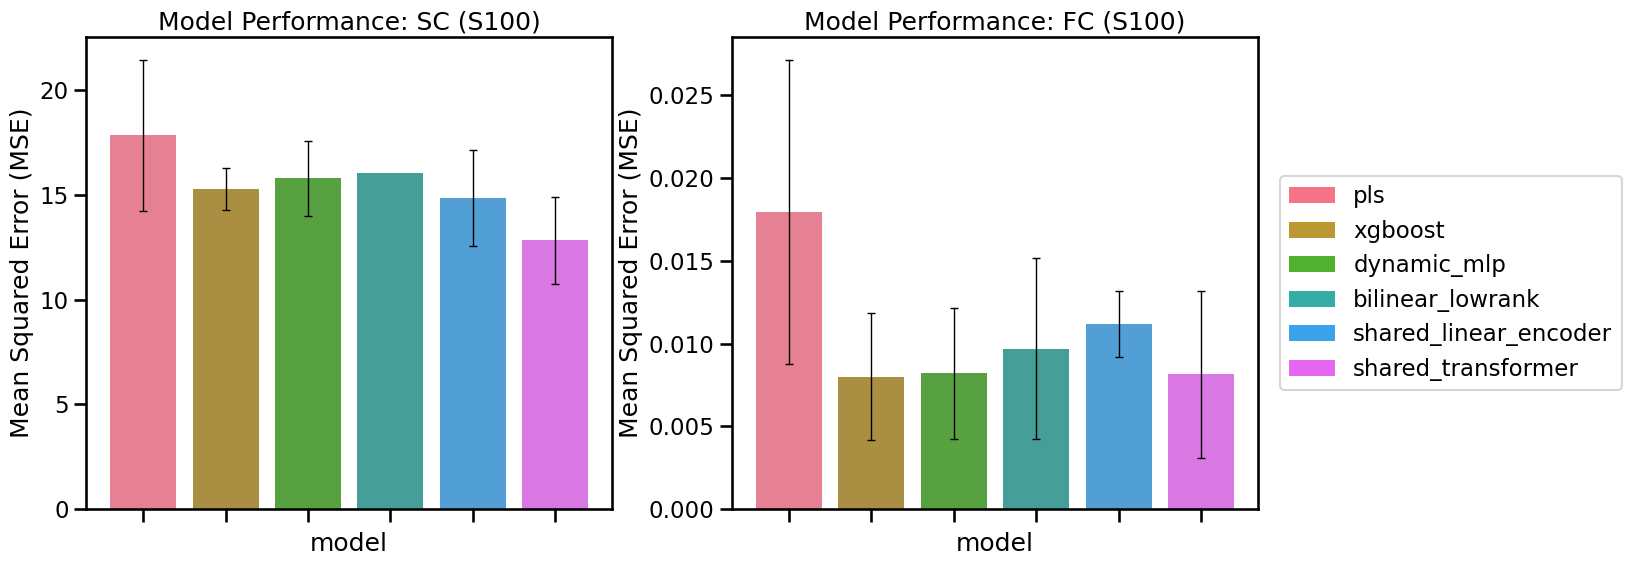

In [115]:
# Choose metric to plot
metric = 'final_test_metrics.mse'  # Can be 'final_test_metrics.pearson_corr' or 'final_test_metrics.r2'
metric_mean = f'{metric}_mean'
metric_std = f'{metric}_std'

# Define model order and color palette
model_order = ['pls', 'xgboost', 'dynamic_mlp', 'bilinear_lowrank', 
               'shared_linear_encoder', 'shared_transformer']
    
colors = sns.color_palette("husl", n_colors=len(model_order))

# Create figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Plot SC data
bar_plot_sc = sns.barplot(data=sc_summary,
                         x='model',
                         y=metric_mean,
                         order=model_order,
                         palette=colors,
                         ci=None,
                         ax=ax1,
                         legend=False)

# Add error bars for SC
for j, model in enumerate(model_order):
    if model in sc_summary['model'].values:
        model_data = sc_summary[sc_summary['model'] == model]
        ax1.errorbar(x=j,
                    y=model_data[metric_mean].values[0],
                    yerr=model_data[metric_std].values[0],
                    color='black',
                    capsize=3,
                    capthick=1,
                    linewidth=1)

# Plot FC data
bar_plot_fc = sns.barplot(data=fc_summary,
                         x='model',
                         y=metric_mean,
                         order=model_order,
                         palette=colors,
                         ci=None,
                         ax=ax2,
                         legend=False)

# Add error bars for FC
for j, model in enumerate(model_order):
    if model in fc_summary['model'].values:
        model_data = fc_summary[fc_summary['model'] == model]
        ax2.errorbar(x=j,
                    y=model_data[metric_mean].values[0],
                    yerr=model_data[metric_std].values[0],
                    color='black',
                    capsize=3,
                    capthick=1,
                    linewidth=1)

# Get parcellation from transcriptome_sc dataframe
parcellation = transcriptome_sc['parcellation'].iloc[0]

# Customize plots
ax1.set_title(f'Model Performance: SC ({parcellation})')
ax2.set_title(f'Model Performance: FC ({parcellation})')

# Set y-axis label and limits based on metric
if metric == 'final_test_metrics.mse':
    ylabel = 'Mean Squared Error (MSE)'
elif metric == 'final_test_metrics.pearson_corr':
    ylabel = 'Pearson Correlation'
    ax1.set_ylim(0, 1)
    ax2.set_ylim(0, 1)
elif metric == 'final_test_metrics.r2':
    ylabel = 'R² Score'
    ax1.set_ylim(0, 1)
    ax2.set_ylim(0, 1)

ax1.set_ylabel(ylabel)
ax2.set_ylabel(ylabel)

# Remove x-axis labels
ax1.set_xticklabels([])
ax2.set_xticklabels([])

# Create legend
legend_elements = [plt.Rectangle((0,0),1,1, facecolor=color, label=model) 
                  for model, color in zip(model_order, colors)]
fig.legend(handles=legend_elements, loc='center right', bbox_to_anchor=(1.1, 0.5))

# Adjust layout to make room for legend
plt.tight_layout()
plt.subplots_adjust(right=0.85)

plt.show()
